In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV
                                     )
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_error,
                             root_mean_squared_error
                             )

In [2]:
df = pd.read_csv("synthetic_ames_housing.csv")

In [3]:
df

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,GarageArea,Neighborhood,HouseStyle,RoofStyle,Exterior,Heating,SaleCondition,SalePrice
0,17795.0,2,2,2012,461.0,2561,0,NaN,OldTown,1Story,Hip,VinylSd,GasA,Normal,177623
1,2860.0,1,7,1981,634.0,1466,0,939.0,OldTown,2Story,Gable,VinylSd,GasA,Abnorml,109837
2,7390.0,5,1,2015,636.0,3407,3,228.0,Somerst,1.5Fin,Flat,HdBoard,Grav,Normal,307843
3,13964.0,6,8,1994,645.0,2087,0,NaN,NaN,SLvl,Flat,Wd Sdng,GasA,Normal,261490
4,13284.0,3,2,1966,517.0,3816,1,185.0,Somerst,2Story,Hip,MetalSd,GasW,Partial,229215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3164.0,3,2,1991,2597.0,3201,3,NaN,NAmes,2Story,Flat,MetalSd,Grav,Abnorml,302448
9996,2619.0,3,1,2021,2571.0,1814,0,NaN,OldTown,SLvl,Gable,MetalSd,GasA,Normal,159735
9997,9982.0,9,7,2002,1659.0,3044,2,250.0,CollgCr,SLvl,Flat,VinylSd,Grav,Abnorml,343970
9998,5066.0,1,9,1970,1579.0,3872,2,295.0,CollgCr,1.5Fin,Flat,VinylSd,Grav,Abnorml,229789


In [4]:
df.dtypes

LotArea          float64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
TotalBsmtSF      float64
GrLivArea          int64
GarageCars         int64
GarageArea       float64
Neighborhood         str
HouseStyle           str
RoofStyle            str
Exterior             str
Heating              str
SaleCondition        str
SalePrice          int64
dtype: object

In [5]:
df.isnull().sum()

LotArea          500
OverallQual        0
OverallCond        0
YearBuilt          0
TotalBsmtSF      500
GrLivArea          0
GarageCars         0
GarageArea       500
Neighborhood     500
HouseStyle         0
RoofStyle          0
Exterior           0
Heating            0
SaleCondition      0
SalePrice          0
dtype: int64

In [6]:
x = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [7]:
num_cols = x.select_dtypes(include=['int64','float64']).columns
cat_cols = x.select_dtypes(include=['str']).columns

In [8]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols),
])

In [9]:
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regression", LinearRegression()),
])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

In [11]:
lr_pipeline.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('regression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [12]:
y_pred = lr_pipeline.predict(x_test)

In [13]:
r2 = r2_score(y_test, y_pred)

In [14]:
mse = mean_squared_error(y_test, y_pred)

In [15]:
rmse = root_mean_squared_error(y_test, y_pred)

In [16]:
mae = mean_absolute_error(y_test, y_pred)

In [17]:
cv_score = cross_val_score(
    estimator=lr_pipeline,
    X=x_train,
    y=y_train,
    cv=5,
    scoring="r2"
)

In [18]:
print("CV R2 scores:", cv_score)
print("Mean CV R2:", cv_score.mean())
print("Std CV R2:", cv_score.std())

CV R2 scores: [0.93304606 0.93509715 0.92856992 0.92541198 0.93098345]
Mean CV R2: 0.930621712278905
Std CV R2: 0.0033878887455589283


In [19]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("randomforest", RandomForestRegressor(n_estimators=100, random_state=42)),
])

In [20]:
rf_pipeline.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('randomforest', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transfor

In [21]:
feature_names = rf_pipeline.named_steps["preprocessor"].get_feature_names_out()

In [22]:
importances = rf_pipeline.named_steps["randomforest"].feature_importances_

In [23]:
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importances": importances,
}).sort_values(by="Importances", ascending=False)

In [24]:
feature_importance_df.head(10)

,Feature,Importances
5,num__GrLivArea,0.448246
1,num__OverallQual,0.446203
6,num__GarageCars,0.046189
4,num__TotalBsmtSF,0.008772
7,num__GarageArea,0.008596
0,num__LotArea,0.008511
3,num__YearBuilt,0.007815
2,num__OverallCond,0.004649
8,cat__Neighborhood_CollgCr,0.001070
17,cat__RoofStyle_Flat,0.001052


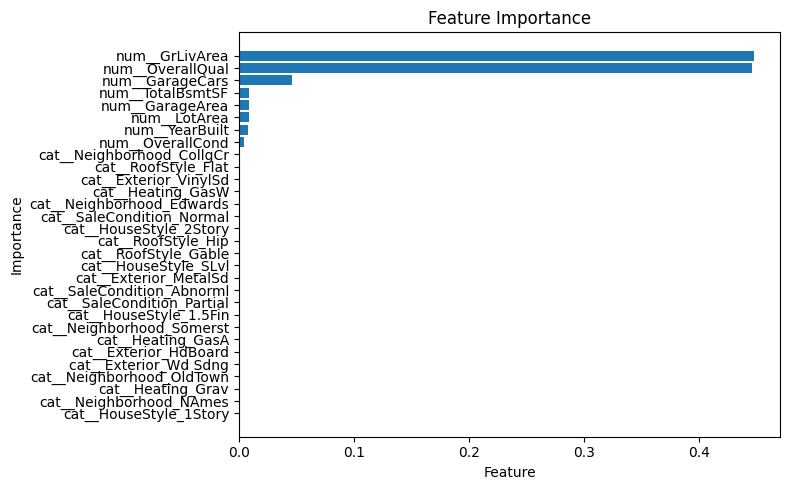

In [25]:
plt.figure(figsize=(8,5))
plt.barh(
    feature_importance_df['Feature'],
    feature_importance_df['Importances'],
)
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [26]:
x = x.drop(columns=["RoofStyle", "Heating"])

In [27]:
num_cols = x.select_dtypes(include=["int64", "float64"]).columns
cat_cols = x.select_dtypes(include=["str"]).columns

In [28]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [30]:
rf_pipeline_reduced = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("randomforest", RandomForestRegressor(n_estimators=100, random_state=42)),
])

In [31]:
param_dist = {
    "randomforest__n_estimators": [50, 100, 150, 200],
    "randomforest__max_depth": [5, 10, 15, 20],
    "randomforest__min_samples_split": [2, 5, 10, 15],
}

In [32]:
random_search_cv = RandomizedSearchCV(
    estimator=rf_pipeline_reduced,
    param_distributions=param_dist,
    n_iter=10,
    cv = 5,
    scoring="r2",
    n_jobs=-1,
)

In [33]:
random_search_cv.fit(x_train, y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'randomforest__max_depth': [5, 10, ...], 'randomforest__min_samples_split': [2, 5, ...], 'randomforest__n_estimators': [50, 100, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here..

In [34]:
random_search_cv.best_params_

{'randomforest__n_estimators': 150,
 'randomforest__min_samples_split': 15,
 'randomforest__max_depth': 20}

In [35]:
best_model = random_search_cv.best_estimator_

In [36]:
y_pred_reduced = best_model.predict(x_test)

In [37]:
r2_reduced = r2_score(y_test, y_pred_reduced)
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
rmse_reduced = root_mean_squared_error(y_test, y_pred_reduced)
mae_reduced = mean_absolute_error(y_test, y_pred_reduced)

In [38]:
print(f"R2 Score :- (Before) = {r2} | (After) = {r2_reduced}")
print(f"Mean Squared Error :- (Before) = {mse} | (After) = {mse_reduced}")
print(f"Root Mean Squared Error :- (Before) = {rmse} | (After) = {rmse_reduced}")
print(f"Mean Absolute Error :- (Before) = {mae} | (After) = {mae_reduced}")

R2 Score :- (Before) = 0.9313809868702179 | (After) = 0.922201325344754
Mean Squared Error :- (Before) = 405082196.68568087 | (After) = 459272971.0200905
Root Mean Squared Error :- (Before) = 20126.653886964938 | (After) = 21430.654936797673
Mean Absolute Error :- (Before) = 16076.115035825953 | (After) = 17120.802912309886
